In [193]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import alen, arange
import math
from math import sqrt
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import AdaBoostRegressor
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

from sklearn.svm import SVR
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from scipy.signal import savgol_filter
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy.signal import savgol_filter
import seaborn as sns

In [194]:
#BPSO

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Define objective function
def f_per_particle(m, alpha):
    
    total_features = dimensions
    # Get the subset of the features from the binary mask

    if np.count_nonzero(m) == 0:
        X_subset = X_train
    else:
        X_subset = X_train[:,m==1]

    regr = make_pipeline(StandardScaler(), SVR())
    y_pred = cross_val_predict(regr, X_subset, y_train, cv=10)
    r2cv = r2_score(y_train, y_pred)
    P = r2cv

    # Compute for the objective function
    j = (alpha * (1.0 - P)
        + (1.0 - alpha) * (1 - (X_subset.shape[1] / total_features)))

    return j

def f(x, alpha=0.88):

    n_particles = x.shape[0]
    j = [f_per_particle(x[i], alpha) for i in range(n_particles)]
    return np.array(j)

def snv(input_data):
  
    # Define a new array and populate it with the corrected data  
    output_data = np.zeros_like(input_data)
    for i in range(input_data.shape[0]):
 
        # Apply correction
        output_data[i,:] = (input_data[i,:] - np.mean(input_data[i,:])) / np.std(input_data[i,:])
 
    return output_data

In [195]:
X_train = pd.read_excel(open('../Data/Wheat/wheatkernel.xlsx', 'rb'),
              sheet_name='calibration_X', header=None)
X_test = pd.read_excel(open('../Data/Wheat/wheatkernel.xlsx', 'rb'),
              sheet_name='test_X', header=None)
y_train = pd.read_excel(open('../Data/Wheat/wheatkernel.xlsx', 'rb'),
              sheet_name='calibration_Y', header=None)
y_test = pd.read_excel(open('../Data/Wheat/wheatkernel.xlsx', 'rb'),
              sheet_name='test_Y', header=None)
#df = pd.read_csv('Data/Wheat/evt5_reference_data_fromHoneCreate.csv', sep=';')

In [198]:
df_y = y_train.append(y_test, ignore_index=True)
df_x = X_train.append(X_test, ignore_index=True)
df_y.describe()

,0
count,523.000000
mean,9.958228
std,1.604031
min,6.770000
25%,8.917875
50%,9.770000
75%,10.738593
max,16.950884


In [199]:
df_x.describe()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,...,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000
mean,2.995909,2.993010,2.990086,2.987153,2.984218,2.981288,2.978372,2.975479,2.972611,2.969773,...,2.861539,2.858426,2.855327,2.852253,2.849211,2.846208,2.843245,2.840307,2.837378,2.834452
std,0.188013,0.187571,0.187123,0.186675,0.186226,0.185777,0.185331,0.184890,0.184457,0.184035,...,0.171266,0.170809,0.170357,0.169909,0.169468,0.169035,0.168611,0.168194,0.167786,0.167388
min,2.638791,2.636990,2.635159,2.633342,2.631548,2.629776,2.627980,2.626175,2.624344,2.622520,...,2.522153,2.519497,2.516825,2.514177,2.511523,2.508901,2.506269,2.503634,2.501001,2.498414
25%,2.843292,2.840652,2.838031,2.835476,2.832919,2.830409,2.827918,2.825463,2.823058,2.820655,...,2.722787,2.720385,2.717951,2.715295,2.712576,2.710034,2.707323,2.704371,2.701572,2.699050
50%,2.982492,2.979407,2.976281,2.973498,2.970721,2.967951,2.965202,2.962459,2.959708,2.956274,...,2.850924,2.847887,2.845430,2.842974,2.840542,2.837878,2.834984,2.832121,2.829268,2.826407
75%,3.128101,3.124765,3.121396,3.118045,3.114924,3.111825,3.108761,3.105748,3.102759,3.099569,...,2.984951,2.981271,2.977667,2.974121,2.970518,2.967026,2.964230,2.960958,2.957705,2.954436
max,3.502061,3.498685,3.495242,3.491803,3.488400,3.484926,3.481374,3.477843,3.474308,3.470836,...,3.334358,3.330844,3.327304,3.323814,3.320332,3.316877,3.313466,3.310083,3.306721,3.303349


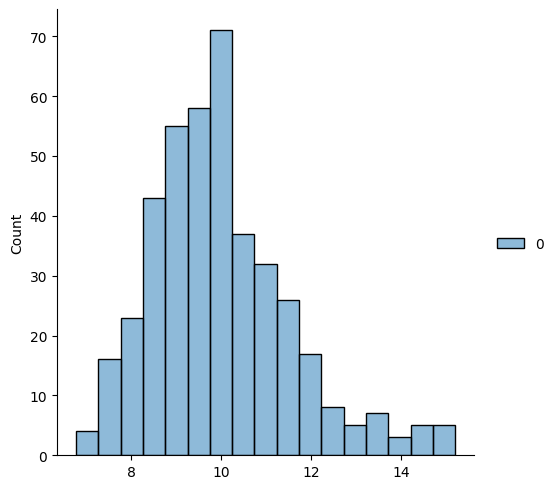

In [200]:
sns.displot(y_train)

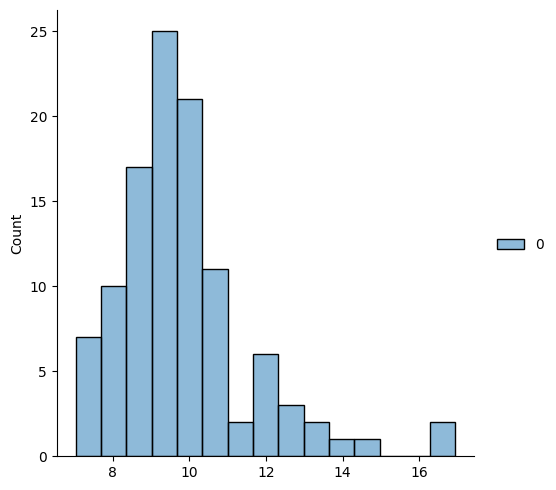

In [201]:
sns.displot(y_test)

In [202]:
x_feature = df_x.columns.to_numpy().astype(float)
x_feature

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90.,
       91., 92., 93., 94., 95., 96., 97., 98., 99.])

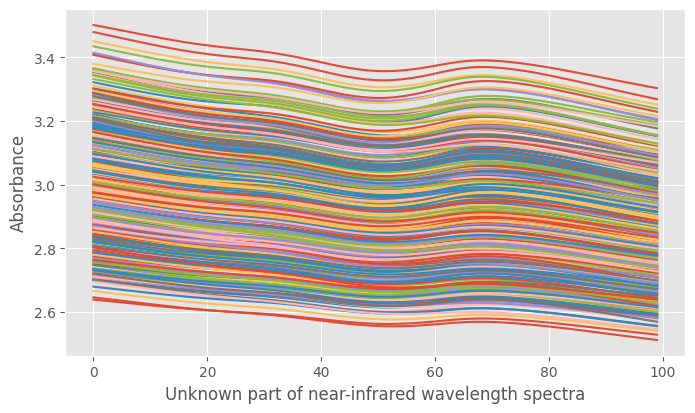

In [203]:
wl = np.arange(0, 100, 1)
plt.figure(figsize=(8, 4.5))
with plt.style.context('ggplot'):
    plt.plot(x_feature, X_train.values.T)
    plt.xlabel("Unknown part of near-infrared wavelength spectra")
    plt.ylabel("Absorbance")
    plt.show()

In [204]:
X_train.shape[1]
wl_list = np.arange(0, 100, 1)
wl_list1 = np.arange(0, 100, 1)

In [205]:
###Data Preprocessing
X_train = snv(X_train.values)
X_test = snv(X_test.values)

X_train = savgol_filter(X_train, 3, polyorder=2, deriv=1)
X_test = savgol_filter(X_test, 3, polyorder=2, deriv=1)



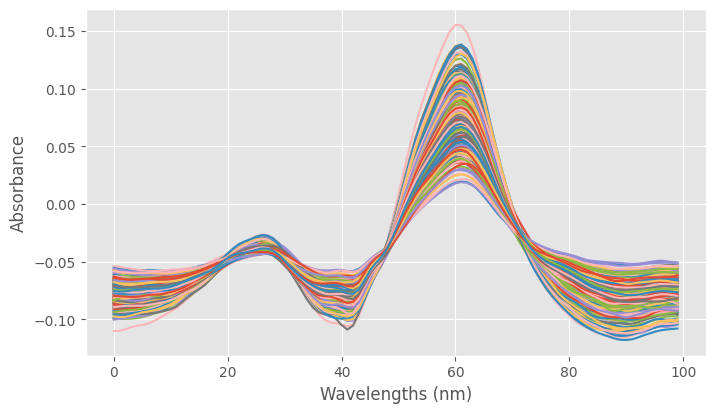

In [206]:
wl = np.arange(0, 100, 1)
plt.figure(figsize=(8, 4.5))
with plt.style.context('ggplot'):
    plt.plot(wl, X_train.T)
    plt.xlabel("Wavelengths (nm)")
    plt.ylabel("Absorbance")
    plt.show()

In [207]:
try:
    #X_train = X_train.to_numpy()
    #X_test = X_test.to_numpy()
    y_train = y_train.values.ravel()
    y_test = y_test.values.ravel()
except:
    pass

In [ ]:
# Import PySwarms
import pyswarms as ps

# Initialize swarm, arbitrary
options = {'c1': 2, 'c2': 2, 'w':1, 'k': 20, 'p':1}

# Call instance of PSO
dimensions = X_train.shape[1] # dimensions should be the number of features
optimizer = ps.discrete.BinaryPSO(n_particles=30, dimensions=dimensions, options=options)
l_col=[]
best = 10
best1 = 15
n=0
while best < best1 :
    
        if n >0 :
            if n >1 :
                ## Get the selected features at iteration i-1
                X_train1 = (np.delete(X_train1, m_array1,1))
                X_test1 = (np.delete(X_test1, m_array1,1))
                wl_list1 = np.delete(wl_list1, m_array1)
                m_array1 = m_array
            if n ==1 :
                X_train1 = X_train
                X_test1 = X_test
                m_array1 = m_array

            ## Get the selected features at iteration i
            X_train = (np.delete(X_train, m_array,1))
            X_test = (np.delete(X_test, m_array,1))
            dimensions = X_train.shape[1]
            options = {'c1': 2, 'c2': 2, 'w':1, 'k': 20, 'p':1}
            optimizer = ps.discrete.BinaryPSO(n_particles=30, dimensions=dimensions, options=options)
            best1 = best
            ##Save the selected features at iteration i-1
            
            
            

        # if  X_train.shape[1]<30:
        #     opt_comp = 3
        #     options = {'c1': 0.5, 'c2': 0.5, 'w':0.9, 'k': 20, 'p':1}
        #     optimizer = ps.discrete.BinaryPSO(n_particles=20, dimensions=dimensions, options=options)
        

        if X_train.shape[1] < 20:
            break

        # Perform optimization
        cost, pos = optimizer.optimize(f, iters=100, verbose=2)
        optimizer.reset()
        best = round(cost,3)
        print(best)            
        m_array = np.where(pos == 0)
        print(X_train.shape)
        print(n)
        wl_list = np.delete(wl_list, m_array)
        n +=1  

In [ ]:
regr = make_pipeline(StandardScaler(),  SVR())
cv = LeaveOneOut()
X1 = X_train1 
X2 = X_test1

X = np.concatenate((X_train1, X_test1))
y = pd.concat([pd.DataFrame(y_train), pd.DataFrame(y_test)], axis=0)

# Fit
regr.fit(X1, y_train)
# Cross-validation
y_cv = cross_val_predict(regr,X1, y_train, cv=cv)
y_pred = regr.predict(X2)
y_pred_tot = regr.predict(X)
# Calculate scores
score = r2_score(y_train, y_cv)
score_train = mean_squared_error(y_train, y_cv,squared=False)
score_test = mean_squared_error(y_test, y_pred,squared=False)
score_tot = r2_score(y, y_pred_tot)
score_rmse_tot = mean_squared_error(y, y_pred_tot,squared=False)


print('N Wave: ', X_train1.shape)
print('R2CV: ', score)
print('RMSECV: ', score_train)
print('RMSE test: ', score_test)


print('Pour comparaison')
print('R2: ', score_tot)
print('RMSE: ', score_rmse_tot)